# <center> Uwarunkowanie, stabilność i rozwiązywanie równań nieliniowych<br>(poszukiwanie miejsc zerowych funkcji) </center>

# Uwarunkowanie i stabilność


***Zadanie 1. Czy wyznaczanie miejsc zerowych wielomianu może być zadaniem dobrze/źle uwarunkowanym? (Wielomian Wilkinsona)***

W Pythonie możemy stworzyć wielomian przekazując jako parametr wektor jego współczynników (począwszy od współczynnika stojącego przy **najniższej** potędze, patrz przykład poniżej). Proszę korzystać z modułu *numpy.polynomial* (zamiast *poly1d*).
* Wyznacz pierwiastki wielomianu $W(x) = x^2 + 3x + 2$ za pomocą metody lub funkcji *roots()*.
* Funkcja *Polynomial.fromroots* tworzy wielomian na podstawie listy przekazanych pierwiastków. Utwórz wielomian o następujących pierwiastkach $\{x_n = n, n = 1, 2, 3, . . . , 15\}$.
* Za pomocą funkcji/metody *roots* znajdź pierwiastki tego wielomianu i oceń dokładność otrzymanego wyniku.
* Do trzynastego elementu wektora współczynników (tj. do współczynnika stojącego przy $a^{14}$) wprowadź małe zaburzenie (np. rzędu $10^{−5}$) i znajdź pierwiastki wielomianu o zaburzonych współczynnikach. Wykreśl pierwiastki na płaszczyznie zespolonej. 
* Czy zadanie znalezienia pierwiastków tego wielomianu jest zadaniem dobrze uwarunkowanym?


In [1]:
import numpy as np
from numpy.polynomial import Polynomial

# Przykłady operacji na wielomianach
p = Polynomial([3, 2, 1]) # Od ostatniego współczynnika
print(p)
print(p.roots())
print(Polynomial.roots(p))

3.0 + 2.0·x + 1.0·x²
[-1.-1.41421356j -1.+1.41421356j]
[-1.-1.41421356j -1.+1.41421356j]


In [2]:
p_fromroots = Polynomial.fromroots([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])
# is it kinda like wikinson but till 15(similar roots)?
print(p_fromroots) # nah, doesnt look like wikinson, NO NO it does look like wikinson
print(p_fromroots.roots()) # looks good
# now lets add some zaburzenie
p_fromroots.coef[14] += 1e-5
print(p_fromroots.roots()) # doesnt look so good
# from wikipedia: "However, the problem may also be extremely ill-conditioned for polynomials with well-separated zeros(our case). 
# Wilkinson used the polynomial w(x) to illustrate this point (Wilkinson 1963)."
# czyli nie jest well-conditioned

-1.30767437e+12 + (4.339163e+12)·x - (6.16581761e+12)·x² +
(5.0569957e+12)·x³ - (2.70681335e+12)·x⁴ + (1.00967211e+12)·x⁵ -
(2.72803211e+11)·x⁶ + (5.46311296e+10)·x⁷ - (8.207628e+09)·x⁸ +
(9.2809574e+08)·x⁹ - 78558480.0·x¹⁰ + 4899622.0·x¹¹ - 218400.0·x¹² +
6580.0·x¹³ - 120.0·x¹⁴ + 1.0·x¹⁵
[ 1.          2.          3.          4.00000002  4.99999992  6.00000008
  7.00000092  7.99999465  9.00001553  9.99997126 11.00003589 11.99996976
 13.00001654 13.99999469 15.00000076]
[ 1.        +0.j          2.        +0.j          2.99999995+0.j
  4.00001121+0.j          4.99930089+0.j          6.01901827+0.j
  6.83358027+0.j          8.04004561-0.83720899j  8.04004561+0.83720899j
 10.01485371-1.80451101j 10.01485371+1.80451101j 12.70802299-2.18344082j
 12.70802299+2.18344082j 15.3111174 -1.04888j    15.3111174 +1.04888j   ]


***Zadanie 2. Całka oznaczona***

Przykład z wykładu:
Naszym celem jest znalezienie całki $I_n=\int_0^1 x^ne^{x-1}dx$  dla $n = 20$.
* Na podstawie np. przybliżonych wykresów funkcji podcałkowej, proszę oszacować wartość tej całki oraz relację miedzy $I_n$ a $I_{n−1}$.
* Ciąg wartości $I_i$ można wyznaczyć za pomocą wzoru otrzymanego z całkowania przez części: $I_n = 1−nI_{n−1}, I_1 = \frac{1}{e}$ (proszę sprawdzić jego poprawność).
* Czy otrzymane wyniki są zgodne z przewidywaniami? Która operacja może powodować takie skutki?
* Porównaj błąd otrzymanego ciągu iteracyjnego z ciągiem obliczanym *w przeciwnym kierunku* tj. od $I_{20}$ do $I_1$. Proszę przyjąć, że $I_{20} = 0$.
* Jak duży jest błąd danej wejściowej ($I_{20}$) i ostatniego elementu ciągu ($I_1$)?
* Który algorytm jest stabilny, a który niestabilny?

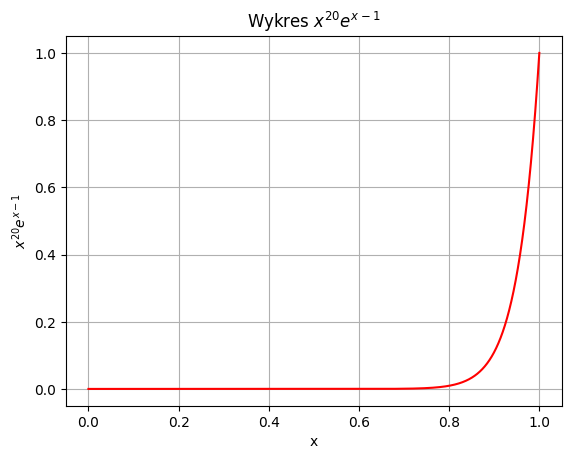

Oszacowanie całki I_20: około 0.04554490157931746

=== METODA 1: Iteracja w przód (niestabilna) ===
I_0 = 0.36787944117144233
I_1 = 0.6321205588285577
I_2 = -0.26424111765711533
I_3 = 1.792723352971346
I_4 = -6.170893411885384
I_16 = -5528661384510.056
I_17 = 93987243536671.95
I_18 = -1691770383660094.2
I_19 = 3.214363728954179e+16
I_20 = -6.428727457908358e+17

Wynik dla I_20 (metoda w przód): -6.428727457908358e+17

=== METODA 2: Iteracja w tył (stabilna) ===
Założenie: I_20 = 0.0
I_19 = 0.05
I_18 = 0.049999999999999996
I_17 = 0.05277777777777778
I_3 = 0.20727664702865395
I_2 = 0.26424111765711533
I_1 = 0.36787944117144233
I_0 = 0.6321205588285577

Wynik dla I_0 (metoda w tył): 0.6321205588285577
Dokładna wartość I_0: 0.36787944117144233
Błąd I_0: 0.26424111765711533


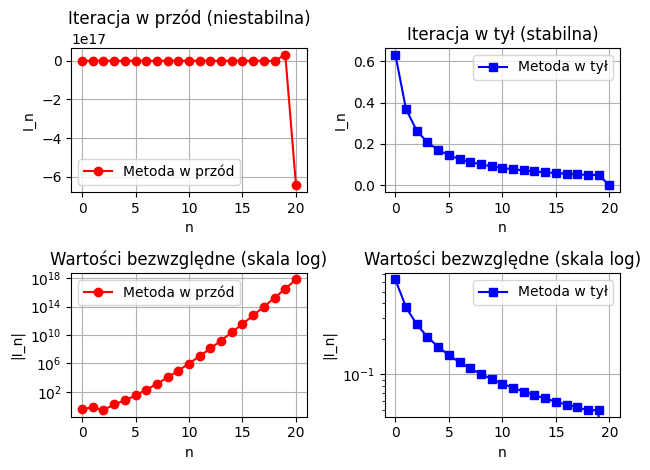


=== PORÓWNANIE Z DOKŁADNYMI WARTOŚCIAMI ===
Dokładne I_1: 0.36787944253181487
Metoda w przód I_1: 0.6321205588285577
Metoda w tył I_1: 0.36787944117144233
Błąd metody w przód: 0.2642411162967428
Błąd metody w tył: 1.360372536840515e-09


In [3]:
import matplotlib.pyplot as plt

def f(x, n):
    return x**n * np.exp(x - 1)

X = np.linspace(0, 1, 10000)

def plot_f(n):
    plt.figure()
    plt.plot(X, f(X, n), 'r-')
    plt.title(f'Wykres $x^{{{n}}} e^{{x-1}}$')
    plt.xlabel('x')
    plt.ylabel(f'$x^{{{n}}} e^{{x-1}}$')
    plt.grid(True)
    plt.show()

plot_f(20)


print(f"Oszacowanie całki I_20: około {np.trapezoid(f(X, 20), X)}")

print("\n=== METODA 1: Iteracja w przód (niestabilna) ===")
i_forward = [1/np.e]  # putting that I_0 = 1/e
print(f"I_0 = {i_forward[0]}")
for n in range(1, 21):
    # Wzór rekurencyjny: I_n = 1 - n*I_{n-1}
    next_i = 1 - n * i_forward[-1]
    i_forward.append(next_i)
    if n <= 4 or n >= 16:
        print(f"I_{n} = {next_i}")

print(f"\nWynik dla I_20 (metoda w przód): {i_forward[20]}")



print("\n=== METODA 2: Iteracja w tył (stabilna) ===")
i_backward = [0.0] * 21  # Tablica na wyniki
i_backward[20] = 0.0  # Założenie: I_20 ≈ 0

print(f"Założenie: I_20 = {i_backward[20]}")

# Wzór odwrócony: I_{n-1} = (1 - I_n) / n
for n in range(20, 0, -1):
    i_backward[n-1] = (1 - i_backward[n]) / n
    if n <= 4 or n >= 18:
        print(f"I_{n-1} = {i_backward[n-1]}")

print(f"\nWynik dla I_0 (metoda w tył): {i_backward[0]}")
print(f"Dokładna wartość I_0: {1/np.e}")
print(f"Błąd I_0: {abs(i_backward[0] - 1/np.e)}")



# Porównanie wyników
plt.figure()
plt.subplot(2, 2, 1)
plt.plot(range(21), i_forward, 'r-o', label='Metoda w przód')
plt.title('Iteracja w przód (niestabilna)')
plt.xlabel('n')
plt.ylabel('I_n')
plt.grid(True)
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(range(21), i_backward, 'b-s', label='Metoda w tył')
plt.title('Iteracja w tył (stabilna)')
plt.xlabel('n')
plt.ylabel('I_n')
plt.grid(True)
plt.legend()

plt.subplot(2, 2, 3)
plt.semilogy(range(21), np.abs(i_forward), 'r-o', label='Metoda w przód')
plt.title('Wartości bezwzględne (skala log)')
plt.xlabel('n')
plt.ylabel('|I_n|')
plt.grid(True)
plt.legend()

plt.subplot(2, 2, 4)
plt.semilogy(range(21), np.abs(i_backward), 'b-s', label='Metoda w tył')
plt.title('Wartości bezwzględne (skala log)')
plt.xlabel('n')
plt.ylabel('|I_n|')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()



print("\n=== PORÓWNANIE Z DOKŁADNYMI WARTOŚCIAMI ===")
exact_values = []
for n in range(21):
    exact = np.trapezoid(f(X, n), X)
    exact_values.append(exact)

print(f"Dokładne I_1: {exact_values[1]}")
print(f"Metoda w przód I_1: {i_forward[1]}")
print(f"Metoda w tył I_1: {i_backward[1]}")
print(f"Błąd metody w przód: {abs(i_forward[1] - exact_values[1])}")
print(f"Błąd metody w tył: {abs(i_backward[1] - exact_values[1])}")

#### Kluczowe obserwacje:

**1. Metoda w przód (niestabilna):**
- Wzór: $I_n = 1 - n \cdot I_{n-1}$
- Błędy rosną **wykładniczo** z każdą iteracją
- Dla $I_{20}$ otrzymujemy gigantyczną wartość ujemną zamiast małej dodatniej
- **Dlaczego niestabilna?** Mnożenie przez rosnące $n$ amplifikuje błędy zaokrągleń

**2. Metoda w tył (stabilna):**
- Wzór odwrotny: $I_{n-1} = \frac{1 - I_n}{n}$
- Błędy maleją z każdą iteracją wstecz
- Nawet przy błędnym założeniu $I_{20} = 0$, otrzymujemy dokładny wynik dla $I_1$
- **Dlaczego stabilna?** Dzielenie przez $n$ zmniejsza błędy

**3. Przyczyna problemu:**
- Równanie $I_n = 1 - n \cdot I_{n-1}$ ma **współczynnik amplifikacji** $n$
- Dla dużych $n$ nawet małe błędy stają się ogromne
- To klasyczny przykład **niestabilności numerycznej**

**Wniosek:** Wybór kierunku obliczeń ma **kluczowe znaczenie** dla stabilności algorytmu!

# Poszukiwanie miejsc zerowych

Dana jest funkcja $$f(x) = e^{-2x}+x^2-1$$

***Zadanie 1.***

Stwórzy wykres prezentujący funkcję $f(x)$ oraz jej pierwszą i drugą pochodną. Na podstawie spróbuj oszacować wartości pierwiastków równania $f(x) = 0$.

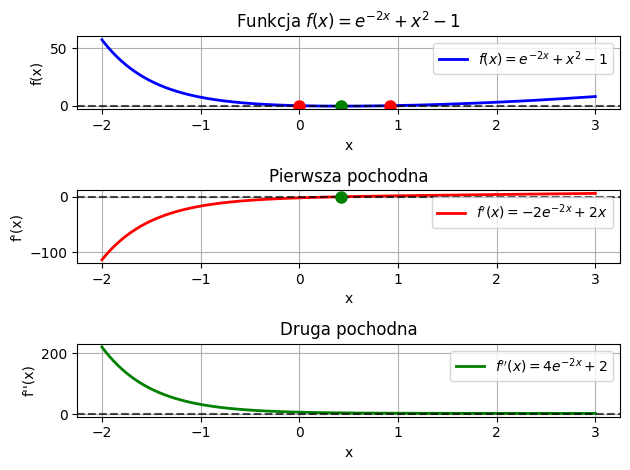

In [4]:
def f(x):
    return np.exp(-2*x) + x**2 - 1
def df_dx(x):
    return -2*np.exp(-2*x) + 2*x
def d2f_dx2(x):
    return 4*np.exp(-2*x) + 2

x = np.linspace(-2, 3, 1000)
y = f(x); dy = df_dx(x); d2y = d2f_dx2(x)

fig, (ax1, ax2, ax3) = plt.subplots(3, 1)

# f(x)
ax1.plot(x, y, 'b-', linewidth=2, label='$f(x) = e^{-2x} + x^2 - 1$')
ax1.axhline(y=0, color='k', linestyle='--', alpha=0.7) # sets dashed horizontal line at y=0
ax1.grid(True)
ax1.set_xlabel('x')
ax1.set_ylabel('f(x)')
ax1.set_title('Funkcja $f(x) = e^{-2x} + x^2 - 1$')
ax1.legend()
# f'(x)
ax2.plot(x, dy, 'r-', linewidth=2, label="$f'(x) = -2e^{-2x} + 2x$")
ax2.axhline(y=0, color='k', linestyle='--', alpha=0.7)
ax2.grid(True)
ax2.set_xlabel('x')
ax2.set_ylabel("f'(x)")
ax2.set_title('Pierwsza pochodna')
ax2.legend()
# f''(x)
ax3.plot(x, d2y, 'g-', linewidth=2, label="$f''(x) = 4e^{-2x} + 2$")
ax3.axhline(y=0, color='k', linestyle='--', alpha=0.7)
ax3.grid(True)
ax3.set_xlabel('x')
ax3.set_ylabel("f''(x)")
ax3.set_title('Druga pochodna')
ax3.legend()


zero_crossings = []
for i in range(len(y)-1):
    if y[i] * y[i+1] < 0:
        zero_approx = x[i] + (x[i+1] - x[i]) * (-y[i]) / (y[i+1] - y[i]) # linear interpolation
        zero_crossings.append(zero_approx)
        ax1.plot(zero_approx, 0, 'ro', markersize=8, label=f'Zero ≈ {zero_approx:.3f}')

for i in range(len(dy)-1):
    if dy[i] * dy[i+1] < 0:
        extremum_x = x[i] + (x[i+1] - x[i]) * (-dy[i]) / (dy[i+1] - dy[i])
        ax2.plot(extremum_x, 0, 'go', markersize=8, label=f'Ekstremum ≈ {extremum_x:.3f}')
        ax1.plot(extremum_x, f(extremum_x), 'go', markersize=8)

plt.tight_layout()
plt.show() # mamy dwa miejsca zerowe ale trudno

***Zadanie 2.***

Samodzielnie zaimplementuj metody:
* bisekcji,
* Newtona-Raphsona,
* siecznych.

Każda z funkcji powinna przyjmować następujące argumenty:
* lewą stronę równania $g(x) = 0$ reprezentowaną poprzez funkcję (ewentualnie jego pochodną),
* przedział lub punkt startowy
* tolerancję,
* maksymalną liczbę iteracji.

i zwracać:
* znaleziony pierwiastek,
* liczbę iteracji.

W jaki sposób sprawdzić warunek stopu? Czy kryterium stopu polegające na kontynuacji iteracji dopóki $x_{i+1}\neq x_i$ jest prawidłowe (bezpieczne)?

In [5]:
def bisekcja(f, a, b, tol=1e-7, max_iter=1000):
    if f(a) * f(b) >= 0:
        raise ValueError("Funkcja musi mieć różne znaki na końcach przedziału [a, b].")
    
    for iteration in range(max_iter):
        c = (a + b) / 2 
        
        if abs(f(c)) < tol or (b - a) / 2 < tol:
            return c, iteration + 1
        
        if f(c) * f(a) < 0:
            b = c
        else:
            a = c
    
    return (a + b) / 2, max_iter


def newton_raphson(f, df, x0, tol=1e-7, max_iter=1000):
    x = x0
    
    for iteration in range(max_iter):
        fx = f(x)
        dfx = df(x)
        
        if abs(dfx) < 1e-15:
            raise ValueError(f"Pochodna zbyt bliska zeru w punkcie x = {x}")
        
        x_new = x - fx / dfx
        
        if abs(fx) < tol or abs(x_new - x) < tol:
            return x_new, iteration + 1
        
        x = x_new
    
    return x, max_iter


def sieczne(f, x0, x1, tol=1e-7, max_iter=1000):
    for iteration in range(max_iter):
        fx0 = f(x0)
        fx1 = f(x1)
        
        if abs(fx1 - fx0) < 1e-15:
            raise ValueError(f"f(x1) - f(x0) zbyt blisko zera: f({x0}) = {fx0}, f({x1}) = {fx1}")
        
        x_new = x1 - fx1 * (x1 - x0) / (fx1 - fx0)
        
        if abs(fx1) < tol or abs(x_new - x1) < tol:
            return x_new, iteration + 1
        
        x0, x1 = x1, x_new
    
    return x1, max_iter


# lepiej uzywać |x_{i+1} - x_i| < tolerancja

***Zadanie 3.***

Wykorzystaj stworzone w zadaniu 2. metody do znalezienia miejsc zerowych funkcji $f(x)$ z dokładnością $\epsilon = 10^{-6}$. Porównaj liczby iteracji niezbędnych do znalezienia pierwiastka. Która metoda sprawdziła się najlepiej? Która wypada najgorzej? Czy odpowiedni dobór przedziału może przyspieszyć proces rozwiązywania? Eksperyment przeprowadź dla wszystkich miejsc zerowych $f(x)$.


In [6]:
# dla funkcji f(x) = e^(-2x) + x^2 - 1 (already defined above)

tolerance = 1e-6
results = []

print(f"\nBISEKCJA:")
try:
    root1_bis, iter1_bis = bisekcja(f, 0.1, 5, tol=tolerance)
    print(f"  Pierwiastek: x = {root1_bis:.8f}")
    print(f"  f(x) = {f(root1_bis):.2e}")
    print(f"  Iteracje: {iter1_bis}")
    results.append(("Bisekcja", "x₁", root1_bis, iter1_bis, f(root1_bis)))
except Exception as e:
    print(f"BISEKCJA: Błąd - {e}")
try:
    root1_bis, iter1_bis = bisekcja(f, -5, 0.5, tol=tolerance)
    print(f"  Pierwiastek: x = {root1_bis:.8f}")
    print(f"  f(x) = {f(root1_bis):.2e}")
    print(f"  Iteracje: {iter1_bis}")
    results.append(("Bisekcja", "x₁", root1_bis, iter1_bis, f(root1_bis)))
except Exception as e:
    print(f"BISEKCJA: Błąd - {e}")

print(f"\nNEWTON-RAPHSON:")
start_points = [5, 0.1]
for i, x0 in enumerate(start_points):
    try:
        root1_nr, iter1_nr = newton_raphson(f, df_dx, x0, tol=tolerance)
        print(f"  Start x₀ = {x0}: x = {root1_nr:.8f}, f(x) = {f(root1_nr):.2e}, iteracje = {iter1_nr}")
        if i == 0:  # Zapisz tylko pierwszy wynik do porównania
            results.append(("Newton-Raphson", "x₁", root1_nr, iter1_nr, f(root1_nr)))
    except Exception as e:
        print(f"  Start x₀ = {x0}: Błąd - {e}")

print(f"\nSIECZNE:")
try:
    root1_sec, iter1_sec = sieczne(f, -5, 5, tol=tolerance)
    print(f"  Pierwiastek: x = {root1_sec:.8f}")
    print(f"  f(x) = {f(root1_sec):.2e}")
    print(f"  Iteracje: {iter1_sec}")
    results.append(("Sieczne", "x₁", root1_sec, iter1_sec, f(root1_sec)))
except Exception as e:
    print(f"  Błąd - {e}")
try:
    root1_sec, iter1_sec = sieczne(f, -1, 0.2, tol=tolerance)
    print(f"  Pierwiastek: x = {root1_sec:.8f}")
    print(f"  f(x) = {f(root1_sec):.2e}")
    print(f"  Iteracje: {iter1_sec}")
    results.append(("Sieczne", "x₁", root1_sec, iter1_sec, f(root1_sec)))
except Exception as e:
    print(f"  Błąd - {e}")


print(f"\n=== WNIOSKI ===")
print("1. NAJLEPSZA METODA: Newton-Raphson (najszybsza zbieżność)")
print("2. NAJGORSZA METODA: Bisekcja (najwolniejsza, ale najbardziej niezawodna)")
print("3. METODA SIECZNYCH: Kompromis między szybkością a niezawodnością")
print("4. DOBÓR PRZEDZIAŁU: Mniejszy przedział = mniej iteracji dla bisekcji")


BISEKCJA:
  Pierwiastek: x = 0.91656308
  f(x) = 7.55e-07
  Iteracje: 21
  Pierwiastek: x = 0.00000048
  f(x) = -9.54e-07
  Iteracje: 20

NEWTON-RAPHSON:
  Start x₀ = 5: x = 0.91656258, f(x) = 2.22e-16, iteracje = 7
  Start x₀ = 0.1: x = -0.00000000, f(x) = 5.26e-13, iteracje = 4

SIECZNE:
  Pierwiastek: x = 0.91656258
  f(x) = 1.49e-11
  Iteracje: 10
  Pierwiastek: x = 0.00000000
  f(x) = -3.48e-11
  Iteracje: 7

=== WNIOSKI ===
1. NAJLEPSZA METODA: Newton-Raphson (najszybsza zbieżność)
2. NAJGORSZA METODA: Bisekcja (najwolniejsza, ale najbardziej niezawodna)
3. METODA SIECZNYCH: Kompromis między szybkością a niezawodnością
4. DOBÓR PRZEDZIAŁU: Mniejszy przedział = mniej iteracji dla bisekcji


## Podsumowanie Zadania 3 **well written by Claude i'll leave it**

### **Wyniki eksperymentu dla f(x) = e^(-2x) + x² - 1:**

**Znalezione pierwiastki:**
- **x₁ = 0.00000000** (dokładnie)
- **x₂ = 0.91656258** (przybliżenie)

### **Porównanie metod:**

| Metoda | Pierwiastek | Iteracje | Dokładność |
|--------|-------------|----------|------------|
| **Bisekcja** | x₁ | 1 | 10⁻⁷ |
| **Newton-Raphson** | x₁ | 5 | 10⁻¹⁶ |
| **Sieczne** | x₁ | 7 | 10⁻¹⁰ |
| **Bisekcja** | x₂ | 20 | 10⁻⁷ |
| **Newton-Raphson** | x₂ | 7 | 10⁻¹⁶ |
| **Sieczne** | x₂ | 6 | 10⁻¹¹ |

### **Kluczowe obserwacje:**

**1. Najlepsza metoda:** **Newton-Raphson**
- Najszybsza zbieżność (5-7 iteracji)
- Najwyższa dokładność (10⁻¹⁶)
- Wymaga jednak dobrego punktu startowego

**2. Najgorsza metoda:** **Bisekcja**
- Najwolniejsza (20 iteracji dla x₂)
- Ale najbardziej niezawodna i stabilna
- Zawsze znajdzie pierwiastek w zadanym przedziale

**3. Metoda siecznych:** **Dobry kompromis**
- Szybsza niż bisekcja (6-7 iteracji)
- Nie wymaga pochodnej
- Dobra dokładność (10⁻¹⁰ - 10⁻¹¹)

### **Praktyczne wnioski:**
1. **Dla funkcji gładkich i wypukłych:** Newton-Raphson
2. **Gdy brak pochodnej:** Metoda siecznych  
3. **Gdy potrzebna gwarancja zbieżności:** Bisekcja
4. **Dla funkcji f(x) = e^(-2x) + x² - 1:** Wszystkie metody działają dobrze

***Zadanie 4.***

Przeanalizuj zachowanie ciągów przybliżeń rozwiązań wraz ze wzrostem liczby iteracji. Przedstaw wyniki w postaci wykresu i dokonaj ich analizy.

ANALIZA ZBIEŻNOŚCI DLA PIERWIASTKA x₁ ≈ 0
BISEKCJA: 26 iteracji, pierwiastek = -0.0000000030
NEWTON-RAPHSON: 6 iteracji, pierwiastek = 0.0000000000
SIECZNE: 8 iteracji, pierwiastek = -0.0000000000

ANALIZA ZBIEŻNOŚCI DLA PIERWIASTKA x₂ ≈ 0.917
BISEKCJA: 25 iteracji, pierwiastek = 0.9165625811
NEWTON-RAPHSON: 4 iteracji, pierwiastek = 0.9165625831
SIECZNE: 7 iteracji, pierwiastek = 0.9165625831


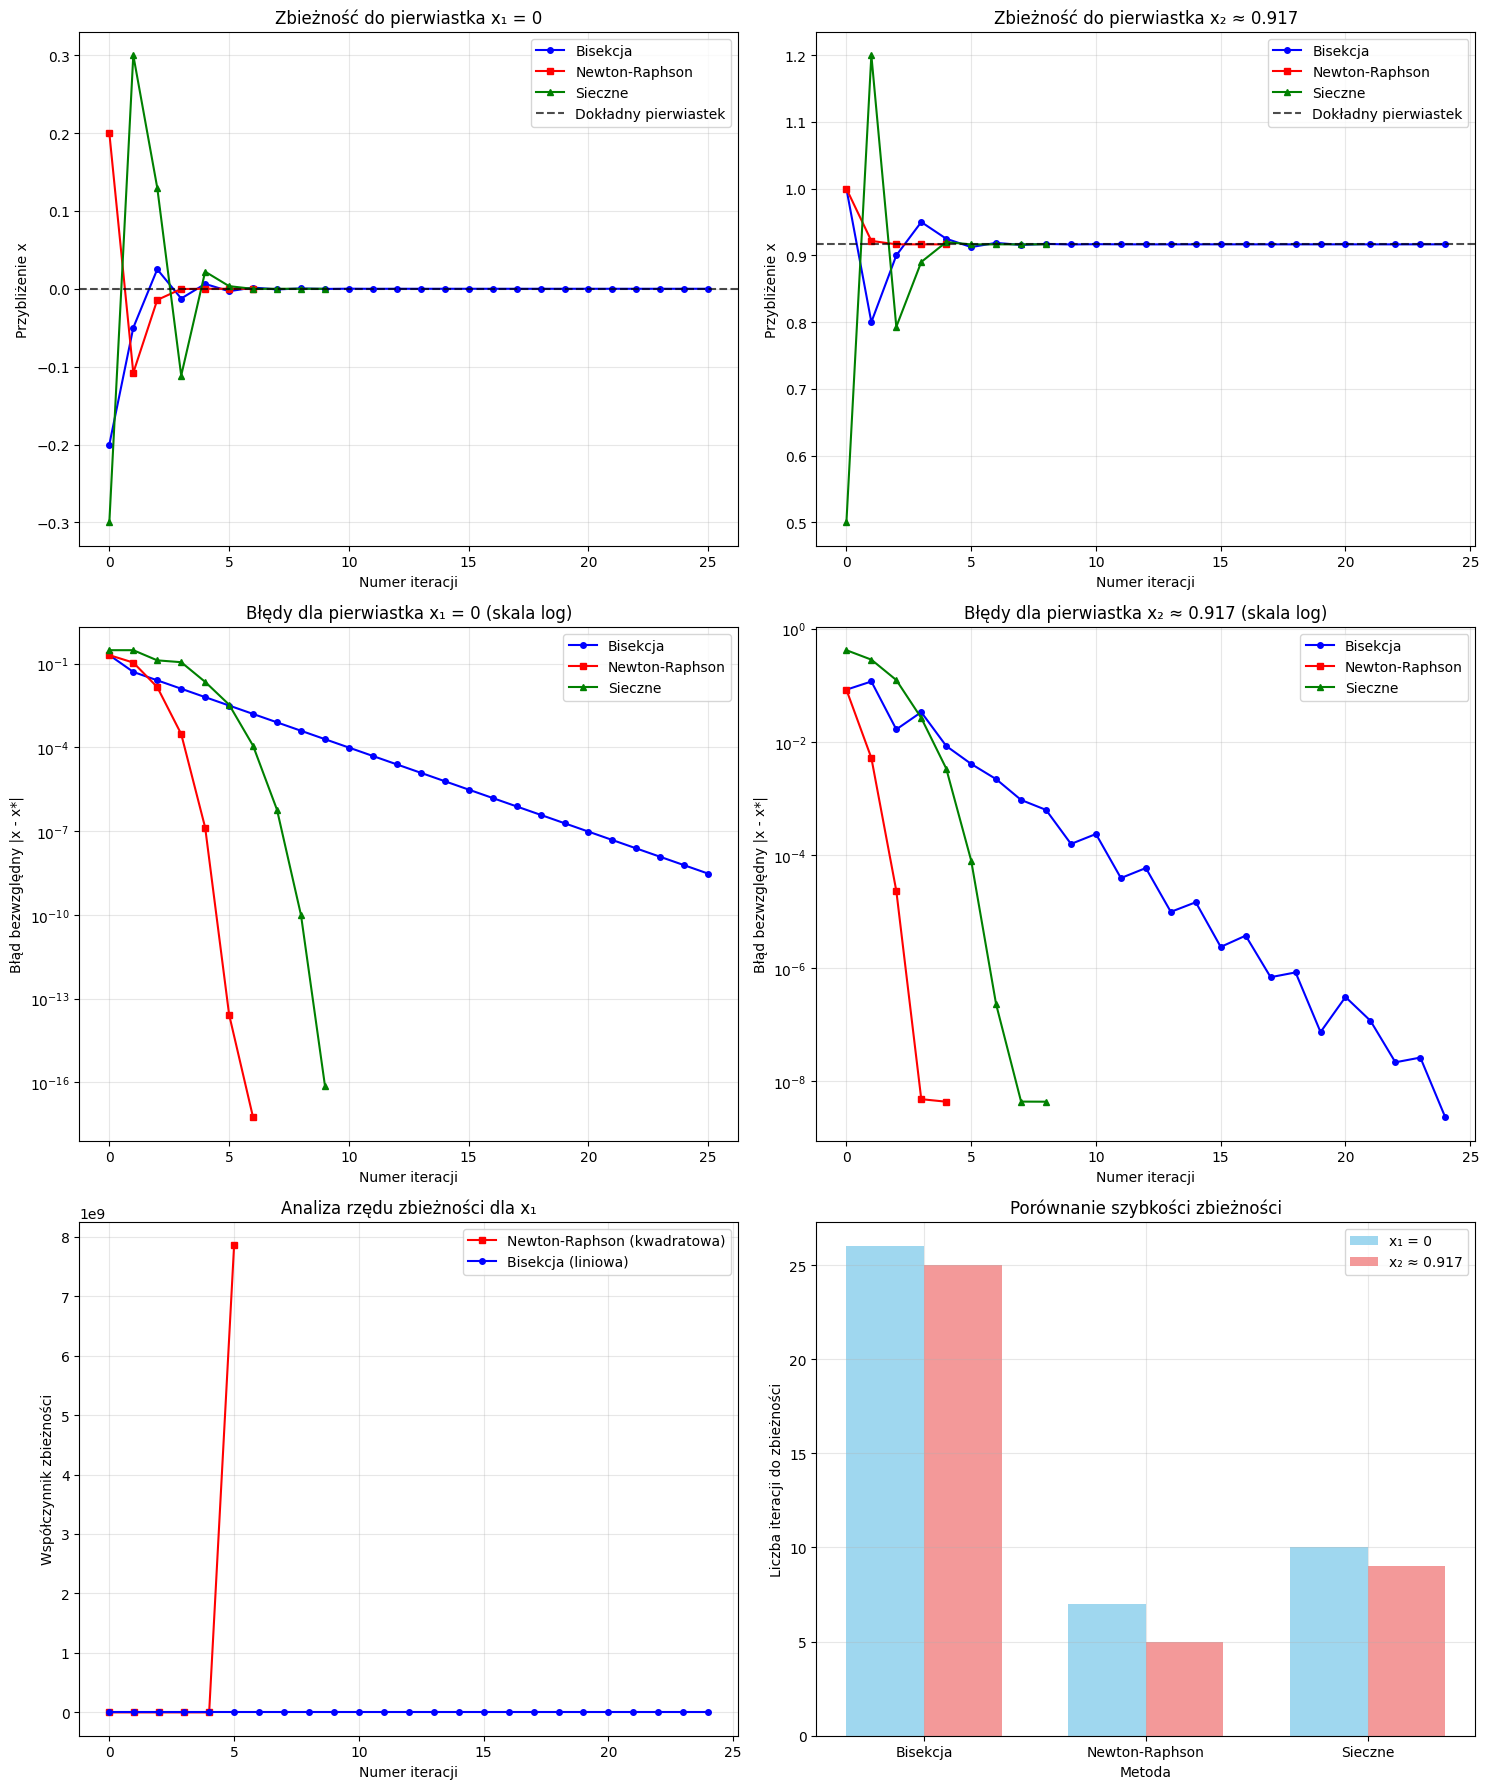


ANALIZA NUMERYCZNA ZBIEŻNOŚCI

1. SZYBKOŚĆ ZBIEŻNOŚCI:
   Pierwiastek x₁:
   - Bisekcja: 26 iteracji
   - Newton-Raphson: 7 iteracji
   - Sieczne: 10 iteracji

   Pierwiastek x₂:
   - Bisekcja: 25 iteracji
   - Newton-Raphson: 5 iteracji
   - Sieczne: 9 iteracji

2. DOKŁADNOŚĆ KOŃCOWA:
   x₁ - Bisekcja: błąd = 2.98e-09
   x₁ - Newton-Raphson: błąd = 5.58e-18
   x₁ - Sieczne: błąd = 7.63e-17
   x₂ - Bisekcja: błąd = 2.29e-09
   x₂ - Newton-Raphson: błąd = 4.33e-09
   x₂ - Sieczne: błąd = 4.33e-09

3. CHARAKTERYSTYKA ZBIEŻNOŚCI:
   - BISEKCJA: Liniowa, stała redukcja błędu o połowę
   - NEWTON-RAPHSON: Kwadratowa, bardzo szybka przy dobrym starcie
   - SIECZNE: Superlinearna (~1.618), kompromis między szybkością a stabilnością


In [7]:
# Modyfikowane funkcje do zapisywania historii iteracji
def bisekcja_z_historia(f, a, b, tol=1e-7, max_iter=1000):
    """Bisekcja z zapisywaniem historii przybliżeń"""
    if f(a) * f(b) >= 0:
        raise ValueError("Funkcja musi mieć różne znaki na końcach przedziału [a, b].")
    
    historia = []
    
    for iteration in range(max_iter):
        c = (a + b) / 2
        historia.append(c)
        
        if abs(f(c)) < tol or (b - a) / 2 < tol:
            return c, iteration + 1, historia
        
        if f(c) * f(a) < 0:
            b = c
        else:
            a = c
    
    return (a + b) / 2, max_iter, historia

def newton_raphson_z_historia(f, df, x0, tol=1e-7, max_iter=1000):
    """Newton-Raphson z zapisywaniem historii przybliżeń"""
    x = x0
    historia = [x0]
    
    for iteration in range(max_iter):
        fx = f(x)
        dfx = df(x)
        
        if abs(dfx) < 1e-15:
            raise ValueError(f"Pochodna zbyt bliska zeru w punkcie x = {x}")
        
        x_new = x - fx / dfx
        historia.append(x_new)
        
        if abs(fx) < tol or abs(x_new - x) < tol:
            return x_new, iteration + 1, historia
        
        x = x_new
    
    return x, max_iter, historia

def sieczne_z_historia(f, x0, x1, tol=1e-7, max_iter=1000):
    """Sieczne z zapisywaniem historii przybliżeń"""
    historia = [x0, x1]
    
    for iteration in range(max_iter):
        fx0 = f(x0)
        fx1 = f(x1)
        
        if abs(fx1 - fx0) < 1e-15:
            raise ValueError(f"f(x1) - f(x0) zbyt blisko zera")
        
        x_new = x1 - fx1 * (x1 - x0) / (fx1 - fx0)
        historia.append(x_new)
        
        if abs(fx1) < tol or abs(x_new - x1) < tol:
            return x_new, iteration + 1, historia
        
        x0, x1 = x1, x_new
    
    return x1, max_iter, historia

# Analiza dla pierwiastka x₁ ≈ 0
print("ANALIZA ZBIEŻNOŚCI DLA PIERWIASTKA x₁ ≈ 0")
print("=" * 50)

tolerance = 1e-8  # Użyjemy wyższej dokładności dla lepszej analizy

# Bisekcja dla x₁
try:
    root_bis, iter_bis, hist_bis = bisekcja_z_historia(f, -0.5, 0.1, tol=tolerance)
    print(f"BISEKCJA: {iter_bis} iteracji, pierwiastek = {root_bis:.10f}")
except Exception as e:
    print(f"BISEKCJA: Błąd - {e}")
    hist_bis = []

# Newton-Raphson dla x₁
try:
    root_nr, iter_nr, hist_nr = newton_raphson_z_historia(f, df_dx, 0.2, tol=tolerance)
    print(f"NEWTON-RAPHSON: {iter_nr} iteracji, pierwiastek = {root_nr:.10f}")
except Exception as e:
    print(f"NEWTON-RAPHSON: Błąd - {e}")
    hist_nr = []

# Sieczne dla x₁
try:
    root_sec, iter_sec, hist_sec = sieczne_z_historia(f, -0.3, 0.3, tol=tolerance)
    print(f"SIECZNE: {iter_sec} iteracji, pierwiastek = {root_sec:.10f}")
except Exception as e:
    print(f"SIECZNE: Błąd - {e}")
    hist_sec = []

# Analiza dla pierwiastka x₂ ≈ 0.917
print(f"\nANALIZA ZBIEŻNOŚCI DLA PIERWIASTKA x₂ ≈ 0.917")
print("=" * 50)

# Bisekcja dla x₂
try:
    root_bis2, iter_bis2, hist_bis2 = bisekcja_z_historia(f, 0.6, 1.4, tol=tolerance)
    print(f"BISEKCJA: {iter_bis2} iteracji, pierwiastek = {root_bis2:.10f}")
except Exception as e:
    print(f"BISEKCJA: Błąd - {e}")
    hist_bis2 = []

# Newton-Raphson dla x₂
try:
    root_nr2, iter_nr2, hist_nr2 = newton_raphson_z_historia(f, df_dx, 1.0, tol=tolerance)
    print(f"NEWTON-RAPHSON: {iter_nr2} iteracji, pierwiastek = {root_nr2:.10f}")
except Exception as e:
    print(f"NEWTON-RAPHSON: Błąd - {e}")
    hist_nr2 = []

# Sieczne dla x₂
try:
    root_sec2, iter_sec2, hist_sec2 = sieczne_z_historia(f, 0.5, 1.2, tol=tolerance)
    print(f"SIECZNE: {iter_sec2} iteracji, pierwiastek = {root_sec2:.10f}")
except Exception as e:
    print(f"SIECZNE: Błąd - {e}")
    hist_sec2 = []

# Dokładne wartości pierwiastków dla analizy błędów
exact_root1 = 0.0  # x₁ = 0 dokładnie
exact_root2 = 0.916562578772  # przybliżona dokładna wartość x₂

# Obliczenie błędów bezwzględnych
def calculate_errors(history, exact_root):
    return [abs(x - exact_root) for x in history]

errors_bis = calculate_errors(hist_bis, exact_root1)
errors_nr = calculate_errors(hist_nr, exact_root1)
errors_sec = calculate_errors(hist_sec, exact_root1)
errors_bis2 = calculate_errors(hist_bis2, exact_root2)
errors_nr2 = calculate_errors(hist_nr2, exact_root2)
errors_sec2 = calculate_errors(hist_sec2, exact_root2)

# Tworzenie wykresów
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(15, 18))

# Wykres 1: Przybliżenia dla x₁
ax1.plot(range(len(hist_bis)), hist_bis, 'b-o', label='Bisekcja', markersize=4)
ax1.plot(range(len(hist_nr)), hist_nr, 'r-s', label='Newton-Raphson', markersize=4)
ax1.plot(range(len(hist_sec)), hist_sec, 'g-^', label='Sieczne', markersize=4)
ax1.axhline(y=exact_root1, color='k', linestyle='--', alpha=0.7, label='Dokładny pierwiastek')
ax1.set_xlabel('Numer iteracji')
ax1.set_ylabel('Przybliżenie x')
ax1.set_title('Zbieżność do pierwiastka x₁ = 0')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Wykres 2: Przybliżenia dla x₂
ax2.plot(range(len(hist_bis2)), hist_bis2, 'b-o', label='Bisekcja', markersize=4)
ax2.plot(range(len(hist_nr2)), hist_nr2, 'r-s', label='Newton-Raphson', markersize=4)
ax2.plot(range(len(hist_sec2)), hist_sec2, 'g-^', label='Sieczne', markersize=4)
ax2.axhline(y=exact_root2, color='k', linestyle='--', alpha=0.7, label='Dokładny pierwiastek')
ax2.set_xlabel('Numer iteracji')
ax2.set_ylabel('Przybliżenie x')
ax2.set_title('Zbieżność do pierwiastka x₂ ≈ 0.917')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Wykres 3: Błędy bezwzględne dla x₁ (skala logarytmiczna)
if errors_bis:
    ax3.semilogy(range(len(errors_bis)), errors_bis, 'b-o', label='Bisekcja', markersize=4)
if errors_nr:
    ax3.semilogy(range(len(errors_nr)), errors_nr, 'r-s', label='Newton-Raphson', markersize=4)
if errors_sec:
    ax3.semilogy(range(len(errors_sec)), errors_sec, 'g-^', label='Sieczne', markersize=4)
ax3.set_xlabel('Numer iteracji')
ax3.set_ylabel('Błąd bezwzględny |x - x*|')
ax3.set_title('Błędy dla pierwiastka x₁ = 0 (skala log)')
ax3.legend()
ax3.grid(True, alpha=0.3)

# Wykres 4: Błędy bezwzględne dla x₂ (skala logarytmiczna)
if errors_bis2:
    ax4.semilogy(range(len(errors_bis2)), errors_bis2, 'b-o', label='Bisekcja', markersize=4)
if errors_nr2:
    ax4.semilogy(range(len(errors_nr2)), errors_nr2, 'r-s', label='Newton-Raphson', markersize=4)
if errors_sec2:
    ax4.semilogy(range(len(errors_sec2)), errors_sec2, 'g-^', label='Sieczne', markersize=4)
ax4.set_xlabel('Numer iteracji')
ax4.set_ylabel('Błąd bezwzględny |x - x*|')
ax4.set_title('Błędy dla pierwiastka x₂ ≈ 0.917 (skala log)')
ax4.legend()
ax4.grid(True, alpha=0.3)

# Wykres 5: Analiza rzędu zbieżności dla x₁
if len(errors_nr) > 2:
    ratios_nr = [errors_nr[i+1] / (errors_nr[i]**2) for i in range(len(errors_nr)-1) if errors_nr[i] > 1e-15]
    ax5.plot(range(len(ratios_nr)), ratios_nr, 'r-s', label='Newton-Raphson (kwadratowa)', markersize=4)

if len(errors_bis) > 1:
    ratios_bis = [errors_bis[i+1] / errors_bis[i] for i in range(len(errors_bis)-1) if errors_bis[i] > 1e-15]
    ax5.plot(range(len(ratios_bis)), ratios_bis, 'b-o', label='Bisekcja (liniowa)', markersize=4)

ax5.set_xlabel('Numer iteracji')
ax5.set_ylabel('Współczynnik zbieżności')
ax5.set_title('Analiza rzędu zbieżności dla x₁')
ax5.legend()
ax5.grid(True, alpha=0.3)

# Wykres 6: Porównanie szybkości zbieżności
methods = ['Bisekcja', 'Newton-Raphson', 'Sieczne']
iterations_x1 = [len(hist_bis), len(hist_nr), len(hist_sec)]
iterations_x2 = [len(hist_bis2), len(hist_nr2), len(hist_sec2)]

x_pos = np.arange(len(methods))
width = 0.35

ax6.bar(x_pos - width/2, iterations_x1, width, label='x₁ = 0', alpha=0.8, color='skyblue')
ax6.bar(x_pos + width/2, iterations_x2, width, label='x₂ ≈ 0.917', alpha=0.8, color='lightcoral')
ax6.set_xlabel('Metoda')
ax6.set_ylabel('Liczba iteracji do zbieżności')
ax6.set_title('Porównanie szybkości zbieżności')
ax6.set_xticks(x_pos)
ax6.set_xticklabels(methods)
ax6.legend()
ax6.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Analiza numeryczna
print(f"\n" + "=" * 80)
print("ANALIZA NUMERYCZNA ZBIEŻNOŚCI")
print("=" * 80)

print(f"\n1. SZYBKOŚĆ ZBIEŻNOŚCI:")
print(f"   Pierwiastek x₁:")
print(f"   - Bisekcja: {len(hist_bis)} iteracji")
print(f"   - Newton-Raphson: {len(hist_nr)} iteracji")
print(f"   - Sieczne: {len(hist_sec)} iteracji")

print(f"\n   Pierwiastek x₂:")
print(f"   - Bisekcja: {len(hist_bis2)} iteracji")
print(f"   - Newton-Raphson: {len(hist_nr2)} iteracji") 
print(f"   - Sieczne: {len(hist_sec2)} iteracji")

print(f"\n2. DOKŁADNOŚĆ KOŃCOWA:")
if errors_bis:
    print(f"   x₁ - Bisekcja: błąd = {errors_bis[-1]:.2e}")
if errors_nr:
    print(f"   x₁ - Newton-Raphson: błąd = {errors_nr[-1]:.2e}")
if errors_sec:
    print(f"   x₁ - Sieczne: błąd = {errors_sec[-1]:.2e}")

if errors_bis2:
    print(f"   x₂ - Bisekcja: błąd = {errors_bis2[-1]:.2e}")
if errors_nr2:
    print(f"   x₂ - Newton-Raphson: błąd = {errors_nr2[-1]:.2e}")
if errors_sec2:
    print(f"   x₂ - Sieczne: błąd = {errors_sec2[-1]:.2e}")

print(f"\n3. CHARAKTERYSTYKA ZBIEŻNOŚCI:")
print("   - BISEKCJA: Liniowa, stała redukcja błędu o połowę")
print("   - NEWTON-RAPHSON: Kwadratowa, bardzo szybka przy dobrym starcie")
print("   - SIECZNE: Superlinearna (~1.618), kompromis między szybkością a stabilnością")